# Tutorial 5: Calculation of total energy of metallic Li (single point calculation)


## Import libraries

In [2]:
import siman #program package to manage DFT calculations https://github.com/dimonaks/siman
from siman.calc_manage import smart_structure_read, get_structure_from_matproj
from siman.calc_manage import add, res
from siman.set_functions import read_vasp_sets
from siman.database import write_database, read_database
from siman.header import db
read_database() # read saved database if available
import project_sets # should be after read_database
varset = read_vasp_sets(project_sets.user_vasp_sets, override_global = 0) #read user sets


%matplotlib inline

/home/t.goryacheva/simanrc.py was read


In [3]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Read POSCAR

In [3]:
st = smart_structure_read('Li2_POSCAR') #read POSCAR file, which you can find in your home directiory
st.printme() # show structure object
st.sg() # show symmetry group

Full Formula (Li2)
Reduced Formula: Li
abc   :   3.491000   3.491000   3.491000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Li    0    0    0
  1  Li    0.5  0.5  0.5
('Im-3m', 229)


('Im-3m', 229)

## Convert to different formats

In [4]:
st.write_xyz() # xyz format

-- File xyz/Li2_.xyz was written 



('xyz/Li2_.xyz', None)

**Now you can find written file in xyz folder**

In [ ]:
st.write_cif() # cif format

**Now you can find written file in cif folder**

## Set input parameters

In [5]:
print(varset.keys()) # varset is a dictionary with created sets of VASP parameters

dict_keys(['aks', 'static', 'opt', 'static_opt', None, 'static_opt_morebands', 'static_energy_100', 'static_energy_200', 'static_energy_300', 'static_energy_400', 'ion_relax_opt', 'u_ion_relax_opt'])


In [6]:
varset['static_opt'].printme() #show all the VASP parameters that set 'static' includes

-- s.vasp_params['EDIFF']         = 1e-05  
-- s.vasp_params['NSW']           = 0  
-- s.vasp_params['EDIFFG']        = 0  
-- s.vasp_params['IBRION']        = 1  
-- s.vasp_params['ISIF']          = 2  
-- s.vasp_params['ENCUT']         = 300  
-- s.vasp_params['ENAUG']         = 700.0  
-- s.vasp_params['KSPACING']      = 0.2  
-- s.vasp_params['LREAL']         = Auto  
-- s.vasp_params['ISMEAR']        = 0  
-- ngkpt: None 

-- POTDIR: {300: 'void', 200: 'octa', 0: 'n', 1: 'H', 2: 'He', 3: 'Li', 4: 'Be', 5: 'B', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 10: 'Ne', 11: 'Na', 12: 'Mg', 13: 'Al', 14: 'Si', 15: 'P', 16: 'S', 17: 'Cl', 18: 'Ar', 19: 'K', 20: 'Ca', 21: 'Sc', 22: 'Ti', 23: 'V', 24: 'Cr', 25: 'Mn', 26: 'Fe', 27: 'Co', 28: 'Ni', 29: 'Cu', 30: 'Zn', 31: 'Ga', 32: 'Ge', 33: 'As', 34: 'Se', 35: 'Br', 36: 'Kr', 37: 'Rb', 38: 'Sr', 39: 'Y', 40: 'Zr', 41: 'Nb', 42: 'Mo', 43: 'Tc', 44: 'Ru', 45: 'Rh', 46: 'Pd', 47: 'Ag', 48: 'Cd', 49: 'In', 50: 'Sn', 51: 'Sb', 52: 'Te', 53: 'I', 54: 'Xe', 55:

## Running job on cluster

In [10]:
add('Li', 'static_opt', 1, input_st = st, it_folder = 'Li/', run = 0) #add calculation on cluster

-- Attention!, cluster None is not found, using default raz 

-- check_kpoints(): Kpoint   mesh is:  [9, 9, 9] 

-- check_kpoints(): The actual k-spacings are  [0.2 0.2 0.2] 

-- POSCAR was written to Li///Li.static_opt/1.POSCAR 

-- Attention! ngkpt =  [9, 9, 9]  is adopted from struct_des which you provided for it  Li  and kspacing =  0.2 


Calculation ('Li', 'static_opt', 1) successfully created

 

JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON) 
Submitted batch job 1327
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON) 
              1327   Regular Li.stati t.goryac PD       0:00      1 (None) 

-- To read results use  res_loop('Li', ['static_opt'], [1], show = 'fo'  )     # , on 2022-11-19   ; possible options for show: fit, fo, fop, en, mag, magp, smag, maga, occ, occ1, mep, mepp 



'Li'

In [11]:
res('Li', 'static_opt', 1) #read resuts of calculation

Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 



Max. F. tot  (meV/A) = 
[0]; 

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Li.static_opt.1']         |Li.static_opt.1|  -3.7941   |3.49, 3.49, 3.49|  -536,-536,-536    |   1, 9,  9    


(["db['Li.static_opt.1']         |Li.static_opt.1|  -3.7941   |3.49, 3.49, 3.49|  -536,-536,-536    |   1, 9,  9   "],
 [])

**now you can find output files of given calculation in 'your_home_folder/Li/Li.static_opt/'**

## Object of Calculation() class

In [12]:
# as the results of calculation were written into database, you can read it easily by special key
db['Li.static_opt.1'] #db[name.set.number]

In [13]:
# this is an object of Calculation() class. It has a special methods
print(dir(db['Li.static_opt.1']))

['NKPTS', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'a', 'actualize_set', 'add_new_name', 'add_potcar', 'associated_outcars', 'average_list', 'bader', 'bader_coseg', 'c', 'calc_kspacings', 'calc_method', 'calculate_nbands', 'calculator', 'check_job_state', 'check_kpoints', 'children', 'cluster', 'cluster_address', 'cluster_home', 'copy', 'copy_to_cluster', 'corenum', 'des', 'deserialize', 'deserialize_json', 'determine_filenames', 'dipole_min_pos', 'dir', 'dos', 'e0', 'e0_at', 'e0_fu', 'e_added_field_ion', 'e_diff', 'e_dipol_quadrupol_cor', 'e_without_entr', 'efermi', 'end', 'energy', 'energy_free', 'energy_sigma0', 'extpress', 'extpress_init', 'full', 'gbpos', 'get_bader_ACF', 'get_chg_fi

In [14]:
#for example you can print a total energy of this atomic configuration
print(db['Li.static_opt.1'].e0)

-3.79405601


## While performing res() we saw a warning message: Warning! TOO FEW BANDS!!!

## so we have to check its value and increase

In [15]:
db['Li.static_opt.1'].set.printme() #show the VASP parameters of given calculation object

-- s.vasp_params['EDIFF']         = 1e-05  
-- s.vasp_params['NSW']           = 0  
-- s.vasp_params['EDIFFG']        = 0  
-- s.vasp_params['IBRION']        = 1  
-- s.vasp_params['ISIF']          = 2  
-- s.vasp_params['ENCUT']         = 300  
-- s.vasp_params['ENAUG']         = 700.0  
-- s.vasp_params['KSPACING']      = 0.2  
-- s.vasp_params['LREAL']         = Auto  
-- s.vasp_params['ISMEAR']        = 0  
-- s.vasp_params['NBANDS']        = 2  
-- ngkpt: [9, 9, 9] 

-- POTDIR: {300: 'void', 200: 'octa', 0: 'n', 1: 'H', 2: 'He', 3: 'Li', 4: 'Be', 5: 'B', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 10: 'Ne', 11: 'Na', 12: 'Mg', 13: 'Al', 14: 'Si', 15: 'P', 16: 'S', 17: 'Cl', 18: 'Ar', 19: 'K', 20: 'Ca', 21: 'Sc', 22: 'Ti', 23: 'V', 24: 'Cr', 25: 'Mn', 26: 'Fe', 27: 'Co', 28: 'Ni', 29: 'Cu', 30: 'Zn', 31: 'Ga', 32: 'Ge', 33: 'As', 34: 'Se', 35: 'Br', 36: 'Kr', 37: 'Rb', 38: 'Sr', 39: 'Y', 40: 'Zr', 41: 'Nb', 42: 'Mo', 43: 'Tc', 44: 'Ru', 45: 'Rh', 46: 'Pd', 47: 'Ag', 48: 'Cd', 49: 'In', 50: 'Sn

## Create new sets with different cut-off energy

In [6]:
energy_cutoff_list = range(100, 500, 100)

In [18]:
from siman.set_functions import read_vasp_sets
# create new set with 3 times more bands
for energy_cut in energy_cutoff_list:
    set_name = "static_energy_" + str(energy_cut)
    varset = read_vasp_sets([(set_name, 'static_opt', {'ENCUT': energy_cut}, 'over')]) 


Attention! You have chosen to override set static_energy_100
 


Attention! You have chosen to override set static_energy_200
 


Attention! You have chosen to override set static_energy_300
 

Warning! You did not change  ENCUT  in static_energy_300 set
 


Attention! You have chosen to override set static_energy_400
 



## Running calculation with new sets

In [20]:
for energy_cut in energy_cutoff_list:
    set_name = "static_energy_" + str(energy_cut)
    add('Li', set_name, 1, input_st = st, it_folder = 'Li/',run = 0)

-- Attention!, cluster None is not found, using default raz 

-- check_kpoints(): Kpoint   mesh is:  [9, 9, 9] 

-- check_kpoints(): The actual k-spacings are  [0.2 0.2 0.2] 

-- POSCAR was written to Li///Li.static_energy_100/1.POSCAR 

-- Attention! ngkpt =  [9, 9, 9]  is adopted from struct_des which you provided for it  Li  and kspacing =  0.2 


Calculation ('Li', 'static_energy_100', 1) successfully created

 

JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON) 
Submitted batch job 1330
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON) 
              1330   Regular Li.stati t.goryac PD       0:00      1 (None) 

-- To read results use  res_loop('Li', ['static_energy_100'], [1], show = 'fo'  )     # , on 2022-11-19   ; possible options for show: fit, fo, fop, en, mag, magp, smag, maga, occ, occ1, mep, mepp 

-- Attention!, cluster None is not found, using default raz 

-- check_kpoints(): Kpoint   mesh is:  [9, 9, 9] 

-- che

In [21]:
for energy_cut in energy_cutoff_list:
    set_name = "static_energy_" + str(energy_cut)
    res('Li', set_name, 1) #read results of calculation with new set

Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 



Max. F. tot  (meV/A) = 
[0]; 

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Li.static_energy_100.1']  |Li.static_energy_100.1|  -3.7716   |3.49, 3.49, 3.49|  -645,-645,-645    |   1, 9,  9    
Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 



Max. F. tot  (meV/A) = 
[0]; 

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Li.static_energy_200.1']  |Li.static_energy_200.1|  -3.7918   |3.49, 3.49, 3.49|  -550,-550,-550    |   1, 9,  9    
Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 



Max. F. tot  (meV/A) = 
[0]; 

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Li.static_energy_300.1']  |Li.static_energy_300.1|  -3.7941   |3.49, 3.49, 3.49|  -536,-536,-536    |   1, 9,  9    
Warning! TOO FEW BANDS!!!


Warning! 

**Warning has been absent!!!**

In [22]:
write_database() #writing all the results into database


Database has been successfully updated



## Compare total energies calculated with different sets

In [7]:
energy_total_list = [db["Li", "static_energy_" + str(energy_cut), 1].e0 for energy_cut in energy_cutoff_list]

energy_relative_list = [(energy_total_list[i] - energy_total_list[-1])*1e3 for i in range(len(energy_cutoff_list))]  

const_list = [db["Li", "static_energy_" + str(energy_cut), 1].end.rprimd[0][0] for energy_cut in energy_cutoff_list]


Text(152, -3.79441415, '0.1 % accuracy')

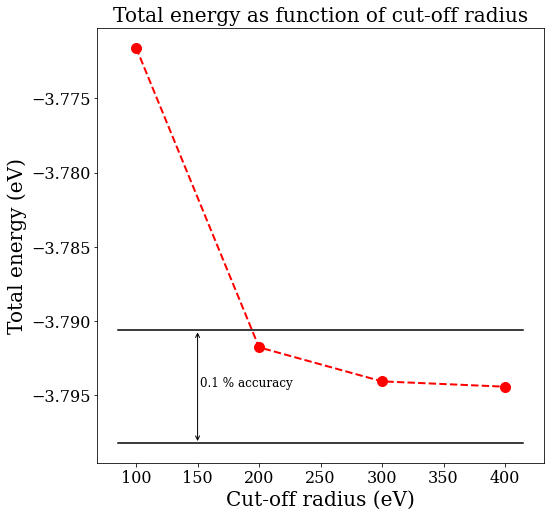

In [24]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 8)

ax1.set_ylabel(r'Total energy (eV)', fontsize=20)
ax1.set_xlabel(r'Cut-off radius (eV)', fontsize=20)
ax1.set_title("Total energy as function of cut-off radius", fontsize=20)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax1.plot(energy_cutoff_list, energy_total_list, "--", c="r", lw=2)
ax1.scatter(energy_cutoff_list, energy_total_list, s=100,  color="red")

xl = ax1.get_xlim()
ax1.plot(xl, [energy_total_list[-1]*0.999, energy_total_list[-1]*0.999], c='black')
ax1.plot(xl, [energy_total_list[-1]*1.001, energy_total_list[-1]*1.001], c='black')
plt.annotate(s="", xy=(150, energy_total_list[-1]*0.999), xytext=(150, energy_total_list[-1]*1.001),
             arrowprops=dict(arrowstyle='<->'))
plt.annotate("0.1 % accuracy", xy=(152,energy_total_list[-1]), fontsize=12 )



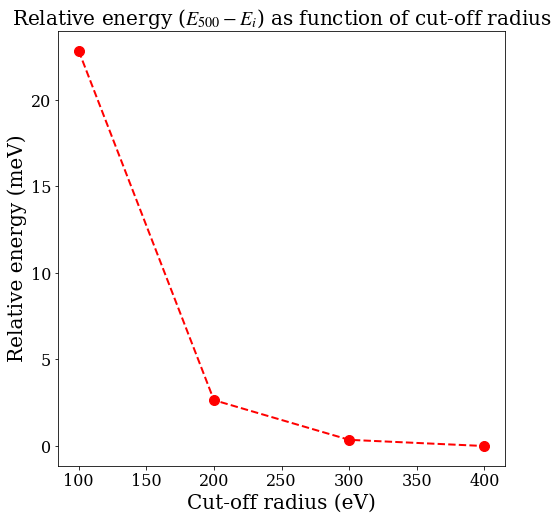

In [9]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 8)

ax1.set_ylabel(r'Relative energy (meV)', fontsize=20)
ax1.set_xlabel(r'Cut-off radius (eV)', fontsize=20)
ax1.set_title(r"Relative energy ($E_{500}-E_{i}$) as function of cut-off radius", fontsize=20)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax1.plot(energy_cutoff_list, energy_relative_list, "--", c="r", lw=2)
ax1.scatter(energy_cutoff_list, energy_relative_list, s=100,  color="red")

## What else to consider? 
Sampling of the Brillouin zone ($k$-points)

Width of smearing ($\sigma$)

Number of Kohn-Sham or Quasiparticle orbitals (NBANDS)

Spin state, magnetic moments, convergence criteria, etc.